# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [ ]:
# 필요 라이브러리부터 설치할게요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget svgling

### 1-2. 라이브러리 import

In [ ]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [ ]:
# FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
# fm.fontManager.addfont(FONT_PATH)
# print(font_name)

# plt.rcParams['font.family']=[font_name]
# plt.rcParams['axes.unicode_minus']=False
# assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

### 1-4. 자바 경로 설정(Windows)

In [ ]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [ ]:
!sudo apt-get install -y fonts-nanum

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
fm.fontManager.addfont(FONT_PATH)
print(font_name)

plt.rcParams['font.family']=[font_name]
plt.rcParams['axes.unicode_minus']=False
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [ ]:
path = '/content/drive/MyDrive/aivle/4차 미니프로젝트/train.csv'
train_df = pd.read_csv(path)
print(train_df.shape)

(3706, 2)


In [ ]:
train_df[:5]

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

----------------------------------------------------------------------------------------------------


코드2       0.296006
웹         0.197518
이론        0.196438
시스템 운영    0.151376
코드1       0.131678
원격        0.026983
Name: label, dtype: float64

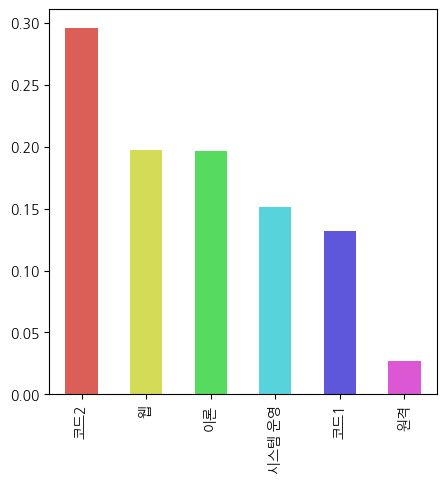

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [ ]:
display(train_df.head(5))
display(train_df.label.value_counts())
print('-'*100)
norm_label = train_df.label.value_counts(normalize = True)
display(norm_label)
norm_label.plot.bar(figsize=(5, 5), color=sns.color_palette('hls', n_colors = len(norm_label)))
plt.show()
train_df.info()
display(train_df.describe(include='all'))

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [ ]:
# print('-'*120)
# text_length = train_df.text.str.len()
# print('최대 길이: ', train_df.text[text_length.argmax()], text_length.argmax())
# print('최소 길이: ', train_df.text[text_length.argmin()], text_length.argmin())
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 1, 1, title = 'max string length: ' + str(max(text_length)))
# sns.histplot(text_length, bins=50)
# plt.grid()

# plt.subplot(2, 1, 2)
# sns.boxplot(x=text_length)
# plt.grid()
# plt.show()

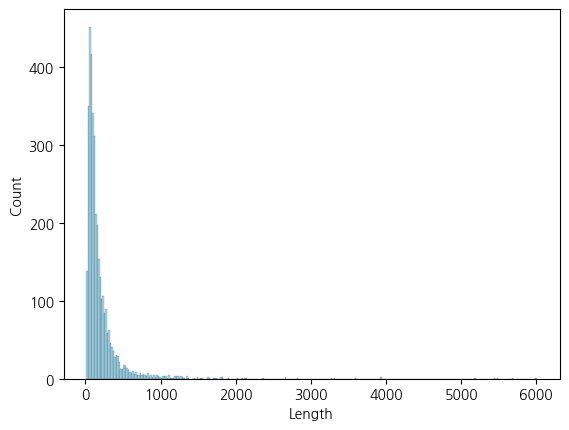

In [ ]:
# 각 문의 내용의 길이를 계산하여 리스트에 저장합니다.
question_lengths = [len(str(question)) for question in train_df['text']]

# 문의 내용의 길이 분포를 히스토그램으로 그립니다.
sns.histplot(question_lengths, kde=False, color='skyblue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

In [ ]:
# 문의 내용의 길이가 가장 작은 문의 내용의 index와 문의 내용을 출력합니다.
min_len_idx = np.argmin(question_lengths)
min_len_question = train_df.iloc[min_len_idx]['text']
print(min_len_question)

원격 부탁드립니다


In [ ]:
# 문의 내용의 길이가 가장 큰 문의 내용의 index와 문의 내용을 출력합니다.
max_len_idx = np.argmax(question_lengths)
max_len_question = train_df.iloc[max_len_idx-1]['text']
print(max_len_question)

오늘 실습을 하면서 궁금한 부분이 있어 문의드립니다.

1. aws 는 서버를 생성하고, putty는 서버를 가동하는 역할을 한다고 이해하면 될까요?? winscp는 어떤 역할을 하나요??


### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
# konlpy(코엔엘파이)는 파이썬에서 한국어 자연어 처리를 위한 라이브러리
# MeCab은 속도가 빠르고 정확한 분석 결과를 제공하며, 다양한 환경에서 사용할 수 있습니다.
import nltk
nltk.download('stopwords')
from konlpy.tag import Okt
from mecab import MeCab
mecab = MeCab()
okt = Okt()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
if 'okt_morph' not in globals():
    %time okt_morphs = train_df.text.apply(lambda t:okt.morphs(str(t)))
    %time okt_nouns = train_df.text.apply(lambda t:okt.nouns(str(t)))
    %time okt_pos = train_df.text.apply(lambda t:okt.pos(str(t), norm = True, stem=True, join = True))

In [ ]:
okt_morphs

0       [self, ., convs, 1, =, nn, ., ModuleList, ([, ...
1       [현재, 이미지, 를, 여러, 개, 업로드, 하기, 위해, 자바스크립트, 로, 동,...
2       [glob, ., glob, (, PATH, ), 를, 사용, 할, 때, 질문, 입...
3       [tmpp, =, tmp, ., groupby, (, by, =, ', Addr, ...
4       [filename, =, TEST, _, IMAGE, +, str, (, round...
                              ...                        
3701    [토큰, 화, 이후, train, val, 를, 분리, 하고, 각, train, s...
3702    [올린, 값, 들, 중, 최고점, 인, 건가, 요, ?, 아니면, 최근, 에, 올린...
3703    [수업, 에서, cacoo, 랑, packet, tracer, 를, 배우는, 이유,...
3704    [inplace, =, True, 해도, 값, 이, 변경, 이, 안되고, none,...
3705    [상관관계, 는, 그렇게, 크지, 않게, 나오는데, p, -, value, 값, 은...
Name: text, Length: 3706, dtype: object

In [ ]:
okt_nouns

NameError: ignored

In [ ]:
okt_pos

In [ ]:
# 문자열을 MeCab형태소 분석기를 사용하여 토큰으로 분리
def mecab_tokenizer(string):
    return list('/'.join(res) for res in mecab.pos(str(string)))

In [ ]:
if 'morphs' not in globals():
    %time morphs = train_df.text.apply(lambda t:mecab.morphs(str(t)))
    %time nouns = train_df.text.apply(lambda t:mecab.nouns(str(t)))
    %time pos_tuple = train_df.text.apply(lambda t:mecab.pos(str(t)))
    %time pos = train_df.text.apply(mecab_tokenizer) 
# okt는 너무 느리다 mecab을 쓰자

CPU times: user 3.16 s, sys: 39 ms, total: 3.2 s
Wall time: 3.21 s
CPU times: user 3.29 s, sys: 16.8 ms, total: 3.31 s
Wall time: 3.32 s
CPU times: user 4.38 s, sys: 58.6 ms, total: 4.44 s
Wall time: 4.49 s
CPU times: user 3.72 s, sys: 29.7 ms, total: 3.75 s
Wall time: 3.77 s


In [ ]:
# morphs[1]

In [ ]:
# nouns[1]

In [ ]:
train_df['text'][1]

'현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요'

In [ ]:
pos_tuple[1]

In [ ]:
pos[2]

In [ ]:
# Number of Samples/ Number of words per sample
# 평균적으로 하나의 문장에 포함된 형태소 개수
len(pos)/pos.apply(len).mean()

46.16679215855003

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
# nltk는 Natural Language Toolkit의 약자
# 자연어 처리를 위한 라이브러리
%%time

# explode()는 리스트 형태의 데이터를 펼쳐서 하나의 행으로 분리
# ex) id    fruit
#      1  [apple, banana]
# explode()를 하면
#     id    fruit
#      1    apple
#      1    banana

nltk_nouns = nltk.Text(nouns.explode())
# nouns리스트 데이터를 하나의 행으로 분리
nltk_nouns = nltk.Text([w for w in nltk_nouns if isinstance(w,str)])
# 문자열이 아닌 다른 데이터 타입이 포함된 경우 제거

nltk_morphs = nltk.Text(morphs.explode())
nltk_morphs = nltk.Text([w for w in nltk_morphs if isinstance(w,str)])

nltk_pos = nltk.Text(pos.explode())
nltk_pos_tuple = nltk.Text(pos_tuple.explode())

CPU times: user 214 ms, sys: 1.94 ms, total: 216 ms
Wall time: 216 ms


In [ ]:
nltk_pos_tuple

<Text: ('self', 'SL') ('.', 'SY') ('convs', 'SL') ('1', 'SN') ('=', 'SY') ('nn', 'SL') ('.', 'SY') ('ModuleList', 'SL')...>

In [ ]:
nltk_nouns

<Text: 여기 커널 사이즈 은 단어 최대 길이 가정...>

In [ ]:
print(nltk_morphs)

<Text: self . convs 1 = nn . ModuleList...>


In [ ]:
type(nltk_morphs)

nltk.text.Text

In [ ]:
display(nltk_nouns.vocab()) # 단어의 출현 빈도 수 반환
print(len(nltk_nouns.vocab()))  # 총 3423개의 고유한 단어 사용 됨

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

3423


In [ ]:
display(nltk_pos.vocab())
print(len(nltk_pos.vocab()))

FreqDist({'(/SSO': 6450, ',/SC': 6342, '-/SY': 5845, './SF': 5557, ')/SSC': 5517, '_/SY': 5425, './SY': 5226, '=/SY': 4081, '하/XSV': 3605, '가/JKS': 3373, ...})

11980


In [ ]:
len(set(nltk_nouns))/len(nltk_nouns) # 서로 다른 단어의 비율

0.060026304252520826

In [ ]:
len(set(nltk_pos))/len(nltk_pos) # 중복을 제거한 형태소의 비율

0.040269449000994974

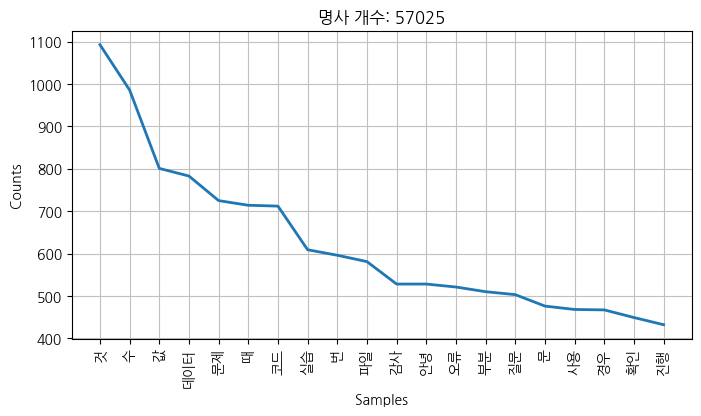

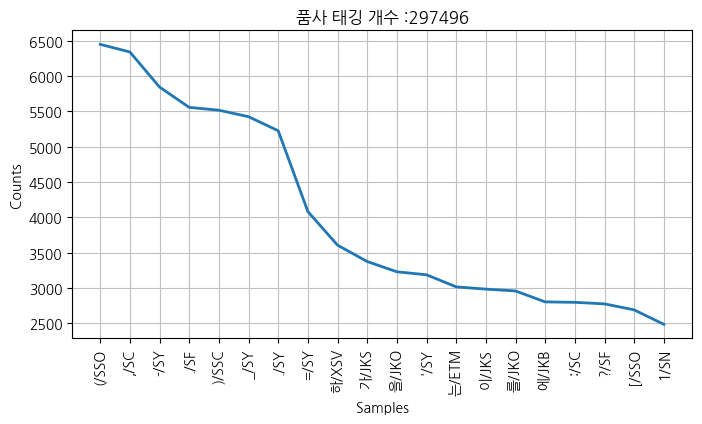

In [ ]:
plt.figure(figsize=(8, 4))
plt.title('명사 개수: ' + str(len(nltk_nouns.tokens)))
nltk_nouns.plot(20)
plt.show()
plt.figure(figsize = (8, 4))
plt.title('품사 태깅 개수 :' + str(len(nltk_pos.tokens)))
nltk_pos.plot(20)
plt.show()

In [ ]:
nltk_nouns.concordance('코드', lines = 10) # '코드'가 포함된 문장 10개 출력
print('*'* 100)
nltk_nouns.similar('코드') # '코드'와 비슷한 환경에서 자주 사용된 단어

In [ ]:
nltk_nouns.concordance('오류', lines = 10)
print('*' * 100)
nltk_nouns.similar('오류')

In [ ]:
nltk_nouns._word_context_index._word_to_contexts['코드']
# _word_to_contexts는 단어를 문맥과 연결하는 인덱스를 나타내는 딕셔너리
# '코드'와 함께 사용된 단어 쌍에 대한 빈도수 출력

FreqDist({('실습', '작성'): 12, ('다음', '작성'): 9, ('위', '실행'): 7, ('아래', '실행'): 5, ('에러', '발생'): 4, ('구', '도착'): 4, ('제', '다음'): 4, ('위', '결과'): 3, ('문제', '작성'): 3, ('방법', '작성'): 3, ...})

In [ ]:
nltk_nouns._word_context_index._word_to_contexts['오류']

FreqDist({('다음', '발생'): 6, ('과정', '발생'): 6, ('실행', '발생'): 4, ('진행', '발생'): 3, ('결과', '발생'): 3, ('클릭', '발생'): 3, ('때', '발생'): 3, ('진행', '진행'): 2, ('오류', '해결'): 2, ('수', '코드'): 2, ...})

In [ ]:
nltk_nouns.common_contexts(['코드', '오류'])

위_실행 위_오류 것_강의 위_부분 작성_위 때_것 다음_에러 작성_문제 다음_데이터 해당_실행


In [ ]:
nltk_nouns._word_context_index.common_contexts(['코드', '오류'])

FreqDist({('위', '실행'): 2, ('위', '오류'): 2, ('것', '강의'): 2, ('위', '부분'): 2, ('작성', '위'): 2, ('때', '것'): 2, ('다음', '에러'): 2, ('작성', '문제'): 2, ('다음', '데이터'): 2, ('해당', '실행'): 2})

In [ ]:
# collocations는 빈도수가 높은 바이그램을 찾아줌
# window_size는 각 단어를 중심으로 몇 개의 전후 단어를 참조하는지
nltk_morphs.collocations(window_size = 5)
print('*'*50)
nltk_nouns.collocations(window_size = 5)
print('*'*50)
nltk_pos.collocations(window_size = 5)

In [ ]:
from konlpy.utils import pprint
from nltk import collocations
measures = collocations.BigramAssocMeasures()
print('\nCollocations among tagged words:')

finder = collocations.BigramCollocationFinder.from_words(nltk_pos_tuple)
# measures.pmi는 양방향 동시 등장 확률을 의미
pprint(finder.nbest(measures.pmi, 10))
# 확률 상위 10개만 출력
# 즉, 두 단어가 함께 나타난 빈도가 예상보다 많은 경우

print('\nCollocations among words:')
words = [w for w, t in nltk_pos_tuple] # 명사가 아닌 모든 단어들
ignored_words = [u'\\', u'\n'] # 무시할 단어들 \\와 \n
finder = collocations.BigramCollocationFinder.from_words(words) # words리스트에서 바이그램 추출
finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words) # 길이가 1이하거나 무시 단어 필터링
finder.apply_freq_filter(5) # 바이그램 출현 빈도가 5보다 작은 것들 필터링
pprint(finder.nbest(measures.pmi, 20)) #pmi가 높은 상위 20개 출력
tags = [t for w, t in nltk_pos_tuple]
finder = collocations.BigramCollocationFinder.from_words(tags)
pprint(finder.nbest(measures.pmi, 5))

In [ ]:
grammar = """
NP: {<N.*>*<Suffix>?}  # Noun phrase
VP: {<V.*>*}           # Verb phrase
AP: {<A.*>*}           # Adgective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

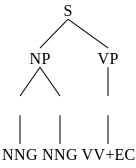

In [ ]:
parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(pos_tuple[train_df.text.str.len().argmin()])
display(chunks_ko)

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

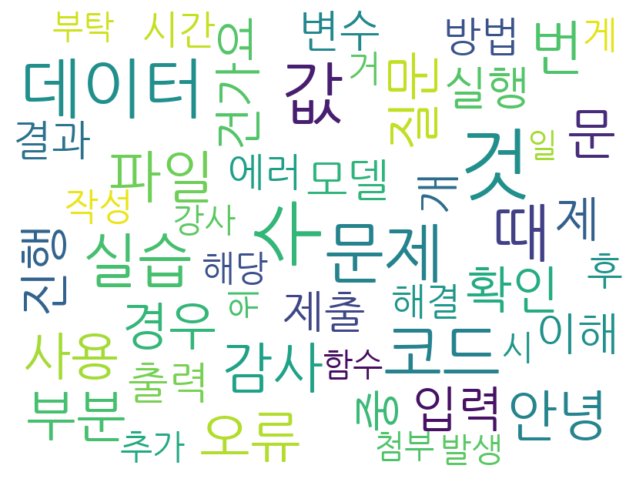

In [127]:
# 단어의 빈도수에 따라 워드 클라우드를 생성
cloud = WordCloud(
    max_font_size = 100, max_words = 50,
    background_color = 'white', relative_scaling = .5,
    width = 800, height = 600, font_path = FONT_PATH).generate_from_frequencies(nltk_nouns.vocab())
    # vocab()은 사용된 언어의 빈도수를 사전 객체에 반환
plt.figure(figsize = (12, 6))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
cloud = WordCloud(
    max_font_size = 100, max_words = 50,
    background_color = 'white', relative_scaling = .5,
    width = 800, height = 600, font_path = FONT_PATH).generate(' '.join(nltk_nouns))
plt.figure(figsize = (12, 6))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()
cloud = WordCloud(
    max_font_size = 100, max_words = 50,
    background_color = 'white', relative_scaling = .5,
    width = 800, height = 600, font_path = FONT_PATH).generate(' '.join(nltk_morphs))
plt.figure(figsize = (12, 6))
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass
    print('*'*120)
    if label is None:
        text_question = df['text'].reset_index(drop = True)
        display(df.label.value_counts())
        norm_label = df.label.value_counts(normalize = True)
        display(norm_label)
        norm_label.plot.bar(figsize = (5, 5), color = sns.color_palette('husl', n_colors = len(norm_label)))
        plt.show()
        df.info()
    else:
        text_question = df.loc[train_df['label'] == label, 'text'].reset_index(drop = True)
        display(f'유형: {label}', text_question.head(10))

    # 데이터 확인
    display(text_question.describe(include='all'))
    # 데이터 길이 분포 시각화

    text_length = text_question.apply(len)
    display(pd.DataFrame(text_length).describe().T)
    print('-'*120)
    print('최대 길이: ', text_question[text_length.argmax()])
    print('최소 길이: ', text_question[text_length.argmin()])

    plt.figure(figsize = (12, 8))
    plt.subplot(2, 1, 1, title = 'max string length: ' + str(max(text_length)))
    sns.histplot(text_length, bins = 50)
    plt.grid()
 
    plt.subplot(2, 1, 2)
    sns.boxplot(x = text_length)
    plt.grid()
    plt.show()
    print('-'*120)

    nouns = text_question.apply(lambda t:mecab.nouns(str(t)))
    nouns = nltk.Text(nouns.explode())
    nouns = nltk.Text([w for w in nouns if isinstance(w, str)])

    # word cloud
    cloud = WordCloud(
        max_font_size = 100, max_words = 50,
        background_color = 'white', relative_scaling = .5,
        width = 800, height = 600, font_path = FONT_PATH
    ).generate(' '.join(nouns))
    plt.figure(figsize = (10, 8))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

    display(nouns.vocab().most_common(n = 10))

### 4-2. 각각의 문의 유형에 대해 실행합니다.

In [ ]:
for label in sorted(train_df.label.unique()):
    text_analysis(train_df,label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

### 5-2. Train Validation split

In [ ]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
preprocessed_df = train_df.replace({'label': label_dict}).copy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
text_analysis(preprocessed_df)

In [ ]:
X_tr, X_val, Y_tr, Y_val = train_test_split(preprocessed_df.text, preprocessed_df.label, test_size = 0.25, random_state = 42)

In [ ]:
X_tr, X_te, Y_tr, Y_te = train_test_split(X_tr, Y_tr, test_size = 0.25, random_state = 42)

In [ ]:
Y_tr[:3]

1450    2
740     2
3325    2
Name: label, dtype: int64

In [ ]:
X_tr

1450    이중화 구성의 목표가 RTO RPO를 줄이려는 것일까요??\n수업 때 다른 분께서 ...
740                 오버피팅과 언더피팅가 정확히 무엇인지 이해하지 못한 것 같습니다ㅠㅠ
3325    EBSi 와 강남구청인터넷수능방송은 공영 플랫폼으로 수익성에 대한 지표가 의미가 없...
625     미니프로젝트 2차 지금 실습하는 부분에서 Q2부분에  script길이를 출력하면 0...
3626                   솔루션 파일이 학습자료에 업로드 되어있습니다 혹시 오류인가요?
                              ...                        
1997    # 단서를 모두 모았다면 드래곤볼을 찾아봅시다! 아래 소스코드를 실행해 주세요.\n...
1530    입력값 설명에 '가장 왼쪽 열과 오른쪽 열은 항상 기둥이 없습니다.' 라고 되어있는...
3266    어제 train 데이터로 모델링 하고 예측한 결과값을 가지고 어떻게 하면 되는지 모...
3142    안녕하세요. \n\nQ1. 이번 프로젝트에서 예측하는 게 '총생활인구수' 가 맞을까...
1441    Age 열 추가를 위해\nmember['Age'] = pd.to_datetime(2...
Name: text, Length: 2084, dtype: object

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [124]:
import re
import string
removal_list = "‘’◇‘”’'·\“·△●■()\">>`/-∼=ㆍ<>.?!【】…◆%"
removal_list += string.punctuation
def cleansing_special(sentence: str = None) -> str:
    """
    특수문자를 전처리를 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """

    sentence = re.sub("[^가-힣0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)

    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()
    return sentence

In [ ]:
X_tr

In [ ]:
for idx, row in preprocessed_df.iterrows():
    sent = row['text']
    if idx < 5:
        print(f"===== {idx} =====")
        print(f"전처리 전: {sent}")
        print(f"전처리 후: {cleansing_special(sent)}")

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [121]:
path = '/content/drive/MyDrive/aivle/4차 미니프로젝트/test.csv'
x_test = pd.read_csv(path)

x_test_te=x_test['text']
type(x_test_te)

pandas.core.series.Series

In [126]:
x_test_sp = x_test_te.apply(lambda x:cleansing_special(x)) # 특문제거

In [132]:
x_test_sp_ngram = count_mecab_vectorizer.transform(x_test_sp) # 특문 + ngram

In [133]:
x_test_sp_tfidf = transformer.fit_transform(x_test_sp_ngram) # 특문 + ngram + tfidf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_mecab_vectorizer = CountVectorizer(tokenizer=mecab_tokenizer, ngram_range=(1, 1))
x_train_mecab = count_mecab_vectorizer.fit_transform(X_tr)
x_test_mecab = count_mecab_vectorizer.transform(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
transformer = TfidfTransformer()
transformer.fit(x_train_mecab)
x_tr_tfidf = transformer.transform(x_train_mecab)
x_test_tfidf = transformer.transform(x_test_mecab)

In [ ]:
x_test_tfidfprint("Count Vectorizer Vocabulary size: ", len(count_vectorizer.vocabulary_))

<929x8568 sparse matrix of type '<class 'numpy.float64'>'
	with 40581 stored elements in Compressed Sparse Row format>

In [129]:
# 텍스트 데이터를 머신러닝 알고리즘에 적용하기 위해서는 
# 텍스트를 수치화된 벡터로 변환
from sklearn.feature_extraction.text import CountVectorizer
# 공백(스페이스바)를 기준으로 분리
# count_vectorizer = CountVectorizer()
count_vectorizer = CountVectorizer(ngram_range=(1, 2))

# 형태소 기준으로 분리
count_mecab_vectorizer = CountVectorizer(tokenizer = mecab_tokenizer)
# mecab_tokenizer 함수를 사용하여 문서를 형태소로 분리한 후 
# 단어 빈도수를 계산하여 문서를 벡터화

# mecab_tokenizer함수는 문자열을 형태소 단위로 토큰화
# 이를 다시 '/' 기호를 이용하여 합쳐서 리스트로 반환

In [ ]:
x_tr_counts = count_vectorizer.fit_transform(X_tr)
x_val_counts = count_vectorizer.transform(X_val)
x_te_counts = count_vectorizer.transform(X_te)

In [131]:
x_tr_mecab_counts = count_mecab_vectorizer.fit_transform(X_tr)
x_val_mecab_counts = count_mecab_vectorizer.transform(X_val)
x_te_mecab_counts = count_mecab_vectorizer.transform(X_te)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# TF-IDF 방법으로 벡터화
# 무조건 CountVectorizer()이후에 사용
transformer = TfidfTransformer()
x_tr_tfidf = transformer.fit_transform(x_tr_mecab_counts)
x_val_tfidf = transformer.transform(x_val_mecab_counts)
x_te_tfidf = transformer.transform(x_te_mecab_counts)

In [ ]:
# TF-IDF 방식을 사용하여 각 단어의 중요도를 계산하여 벡터화
# 문서 내에서 자주 나타나는 단어는 높은 가중치
# 동시에 전체 문서 집합에서 자주 나타나는 단어는 낮은 가중치
# TfidfVectorizer는 CountVectorizer와 TfidfTransformer의 기능을 한 번에 수행합니다.

tfidf_vectorizer = TfidfVectorizer(tokenizer=mecab_tokenizer)
x_tr_tfidfv = tfidf_vectorizer.fit_transform(X_tr)
x_val_tfidfv = tfidf_vectorizer.transform(X_val)
x_te_tfidfv = tfidf_vectorizer.transform(X_te)

In [ ]:
print("Count Vectorizer Vocabulary size: ", len(count_vectorizer.vocabulary_))
print("Count Vectorizer(Mecab tokenizer) Vocabulary size: ", len(count_mecab_vectorizer.vocabulary_))
print("TF-IDF Vectorizer(Mecab tokenizer) Vocabulary size: ", len(tfidf_vectorizer.vocabulary_))

Count Vectorizer Vocabulary size:  68791
Count Vectorizer(Mecab tokenizer) Vocabulary size:  8568
TF-IDF Vectorizer(Mecab tokenizer) Vocabulary size:  8568


In [ ]:
x_tr_tfidf.toarray()[2, 2]

0.0

In [ ]:
x_tr_tfidfv.toarray()[2,2]

0.0

In [ ]:
x_tr_tfidf.toarray()[2,2] == x_tr_tfidfv.toarray()[2,2]

True

In [ ]:
# (x_tr_tfidf - x_tr_tfidfv).nnz

In [ ]:
# np.isclose(x_tr_tfidf.toarray(), x_tr_tfidfv.toarray()).all()

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [ ]:
%%time
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import text
TOP_K = 5000
MAX_SEQUENCE_LENGTH = 500
# X_tr 각 행을 mecab토크나이저로 토큰화
# 토큰화 된 결과를 하나의 문자열로 결합
# 이러한 방식은 이후에 vectorizer하는데 유용
X_mor_tr_str = X_tr.apply(lambda x:' '.join(mecab_tokenizer(x)))
X_mor_val_str = X_val.apply(lambda x:' '.join(mecab_tokenizer(x)))
X_mor_te_str = X_te.apply(lambda x:' '.join(mecab_tokenizer(x)))

# 각 행의 토큰화된 결과를 리스트 형태로 유지
X_mor_tr = X_tr.apply(lambda x:mecab_tokenizer(x))
X_mor_val = X_val.apply(lambda x:mecab_tokenizer(x))
X_mor_te = X_te.apply(lambda x:mecab_tokenizer(x))

CPU times: user 17.5 s, sys: 503 ms, total: 18 s
Wall time: 16.5 s


,count,mean,std,min,25%,50%,75%,max
text,2084.0,78.887716,98.11517,4.0,30.0,52.0,92.0,1553.0


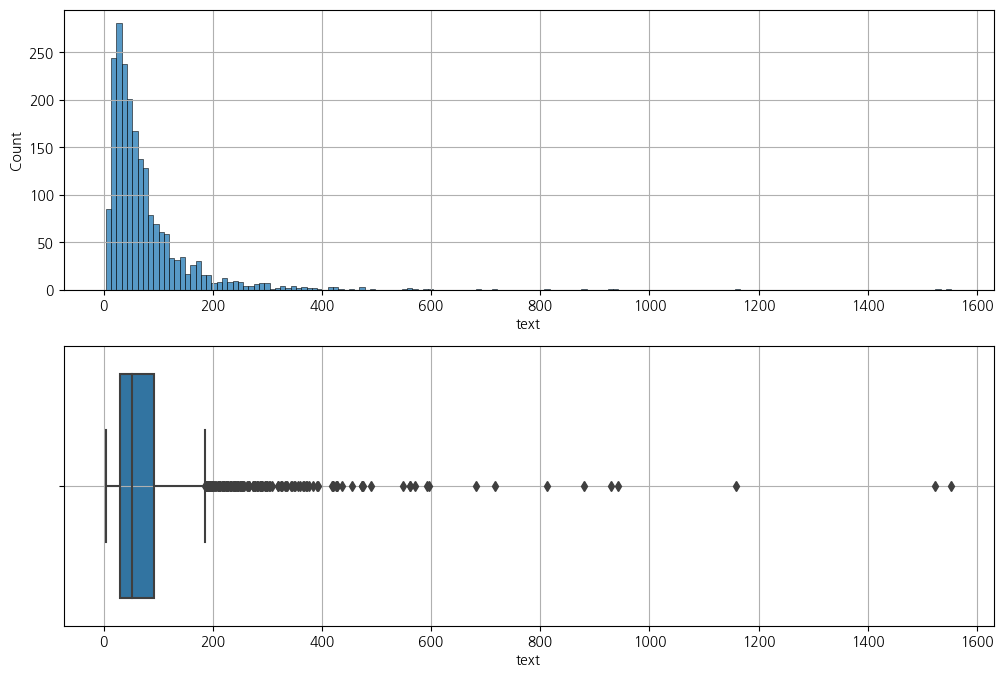

In [ ]:
train_word_counts = X_mor_tr.apply(lambda x:len(x))
display(pd.DataFrame(train_word_counts).describe().T)
plt.figure(figsize = (12, 8))
plt.subplot(2, 1, 1)
sns.histplot(train_word_counts)
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(x=train_word_counts)
plt.grid()
plt.show()

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [ ]:
tokenizer_str = text.Tokenizer(num_words=TOP_K, char_level = False)
tokenizer_str.fit_on_texts(X_mor_tr_str)
X_mor_tr_seq_str = tokenizer_str.texts_to_sequences(X_mor_tr_str)
X_mor_val_seq_str = tokenizer_str.texts_to_sequences(X_mor_val_str)
X_mor_te_seq_str = tokenizer_str.texts_to_sequences(X_mor_te_str)

max_length = len(max(X_mor_tr_seq_str, key = len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
X_mor_tr_seq_str = sequence.pad_sequences(X_mor_tr_seq_str, maxlen = max_length)
X_mor_val_seq_str = sequence.pad_sequences(X_mor_val_seq_str, maxlen = max_length)
X_mor_te_seq_str = sequence.pad_sequences(X_mor_te_seq_str, maxlen = max_length)

500


In [ ]:
tokenizer = text.Tokenizer(num_words = TOP_K, char_level = False)
tokenizer.fit_on_texts(X_mor_tr)
X_mor_tr_seq = tokenizer.texts_to_sequences(X_mor_tr)
X_mor_val_seq = tokenizer.texts_to_sequences(X_mor_val)
X_mor_te_seq = tokenizer.texts_to_sequences(X_mor_te)

# 살짝 잘못되었다.
max_length = len(max(X_mor_tr_seq, key = len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
X_mor_tr_seq = sequence.pad_sequences(X_mor_tr_seq, maxlen = max_length)
X_mor_val_seq = sequence.pad_sequences(X_mor_val_seq, maxlen = max_length)
X_mor_te_seq = sequence.pad_sequences(X_mor_te_seq, maxlen = max_length)

500


In [ ]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol = pickle.HIGHEST_PROTOCOL)
len(tokenizer.word_index)+1

8569

In [ ]:
X_mor_tr_str[2622]

'기존/NNG 에/JKB 있/VV 던/ETM 파일/NNG 을/JKO 삭제/NNG 해서/XSV+EC 윈도우/NNP 10/SN ./SF ova/SL 가져오/VV 기/ETN 가/JKS 안/MAG 되/VV 는데/EC 혹시/MAG 다시/MAG 파일/NNG 새로/MAG 주/VV 실/EP+ETM 수/NNB 있/VV 나요/EF ?/SF'

In [ ]:
tokenizer_str.texts_to_sequences(X_mor_tr_str[2622])

In [ ]:
tokenizer_str.word_counts

In [ ]:
PATH = ('/content/drive/MyDrive/aivle/4차 미니프로젝트')

In [ ]:
# import gdown
# url = 'https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view?resourcekey=0-Dq9yyzwZxAqT3J02qvnFwg'
# output = os.path.join(PATH, 'ko.zip')
# gdown.download(url, output, fuzzy = True, quiet = False)

In [ ]:
# import zipfile
# with zipfile.ZipFile(os.path.join(PATH, 'ko.zip'), 'r') as zip_ref:
#     zip_ref.extractall(PATH)

In [ ]:
# !pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import Word2Vec, FastText, KeyedVectors
import logging
logging.basicConfig(format = '%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
SIZE = 128
WINDOW = 3
MIN_COUNT = 1
w2v_model = Word2Vec(sentences = X_mor_tr,
                     vector_size=SIZE,
                     window=WINDOW,
                     max_vocab_size=None,
                     min_count=MIN_COUNT,
                     workers= 4,
                     epochs=10,
                     negative=5,
                     sg=0)

In [ ]:
!pip install gensim==3.8.3
gensim.__version__

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.3-cp39-cp39-linux_x86_64.whl size=26527997 sha256=6de80fb8503cdda2833fa79e1f6f1eaedbee6c5b88a72c5a410dfe7eebbc638f
  Stored in directory: /root/.cache/pip/wheels/ca/5d/af/618594ec2f28608c1d6ee7d2b7e95a3e9b06551e3b80a491d6
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


'4.3.1'

In [ ]:
pre_trained = Word2Vec.load('/content/drive/MyDrive/aivle/4차 미니프로젝트/ko.bin')

ERROR:gensim.models.word2vec:Model load error. Was model saved using code from an older Gensim Version? Try loading older model using gensim-3.8.3, then re-saving, to restore compatibility with current code.


AttributeError: ignored

In [ ]:
len(w2v_model.wv.index_to_key)

9070

In [ ]:
for index, word in enumerate(w2v_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v_model.wv.index_to_key)} is {word}")
for index, word in enumerate(w2v_model.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(pre_trained.wv.index_to_key)} is {word}")

word #0/9070 is ,/SC
word #1/9070 is (/SSO
word #2/9070 is _/SY
word #3/9070 is ./SF
word #4/9070 is ./SY
word #5/9070 is -/SY
word #6/9070 is )/SSC
word #7/9070 is =/SY
word #8/9070 is 하/XSV
word #9/9070 is 가/JKS


NameError: ignored

In [ ]:
pprint(w2v_model.wv.similar_by_word('문제/NNG'))
pprint(pre_trained.wv.similar_by_word('문제'))

[('어디/NP', 0.8681475520133972),
 ('차이/NNG', 0.8232171535491943),
 ('헷갈리/VV', 0.8139306306838989),
 ('제/NP', 0.8084250092506409),
 ('이유/NNG', 0.8058295249938965),
 ('예시/NNG', 0.8025597333908081),
 ('범위/NNG', 0.7969660758972168),
 ('제출/NNG', 0.7925704717636108),
 ('부분/NNG', 0.790337860584259),
 ('상태/NNG', 0.7874643206596375)]


NameError: ignored

In [ ]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [ ]:
X_pr_tr = get_dataset(X_tr.apply(lambda x: mecab.morphs(x), pre_trained, 200)
X_pr_val = get_dataset(X_val.apply(lambda x: mecab.morphs(x), pre_trained, 200)
X_pr_te = get_dataset(X_te.apply(lambda x: mecab.morphs(x), pre_trained, 200)

In [ ]:
print("X_pr_train shape: ", X_pr_tr.shape)
print("X_pr_val shape: ", X_pr_val.shape)
print("X_pr_te shape: ", X_pr_te.shape)

In [ ]:
np.save('X_pr_train', arr = X_pr_tr)
np.save('X_pr_val', arr = X_pr_val)
np.save('X_pr_te', arr = X_pr_te)

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [ ]:
import numpy as np
import scipy.sparse
print("X_train tfidf shape:", x_tr_tfidf.shape)
print("X_val tfidf shape:", x_val_tfidf.shape)
print("X_te tfidf shape:", x_te_tfidf.shape)

# 모델 학습시에 화라용 가능하도록 전처리 데이터 저장
# numpy의 save 함수 사용
scipy.sparse.save_npz("/content/drive/MyDrive/aivle/4차 미니프로젝트/X_tfidf_train", x_tr_tfidf)
scipy.sparse.save_npz("/content/drive/MyDrive/aivle/4차 미니프로젝트/X_tfidf_val", x_val_tfidf)
scipy.sparse.save_npz("/content/drive/MyDrive/aivle/4차 미니프로젝트/X_tfidf_te", x_te_tfidf)

X_train tfidf shape: (2084, 8568)
X_val tfidf shape: (927, 8568)
X_te tfidf shape: (695, 8568)


In [135]:
scipy.sparse.save_npz('/content/drive/MyDrive/aivle/4차 미니프로젝트/x_test_sp_tfidf', x_test_sp_tfidf)

In [ ]:
scipy.sparse.save_npz("/content/drive/MyDrive/aivle/4차 미니프로젝트/x_test", x_test_tfidf)

In [ ]:
print('X_mor_train seq shape:', X_mor_tr_seq.shape)
print('X_mor_val seq shape:', X_mor_val_seq.shape)
print('X_mor_te seq shape:', X_mor_te_seq.shape)
np.save('/content/drive/MyDrive/aivle/4차 미니프로젝트/X_mor_sequence_train', arr = X_mor_tr_seq)
np.save('/content/drive/MyDrive/aivle/4차 미니프로젝트/X_mor_sequence_val', arr = X_mor_val_seq)
np.save('/content/drive/MyDrive/aivle/4차 미니프로젝트/X_mor_sequence_te', arr = X_mor_te_seq)

X_mor_train seq shape: (2084, 500)
X_mor_val seq shape: (927, 500)
X_mor_te seq shape: (695, 500)


In [118]:
print('y_train shape:', Y_tr.shape)
print('y_val tfidf shape:', Y_val.shape)
# np.save('/content/drive/MyDrive/aivle/4차 미니프로젝트/y_train', arr = Y_tr)
# np.save('/content/drive/MyDrive/aivle/4차 미니프로젝트/y_val', arr = Y_val)

y_train shape: (2084,)
y_val tfidf shape: (927,)
